In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sqlalchemy import create_engine

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y 
y = np.where(y > 0, 0, 1)

# Standardize data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

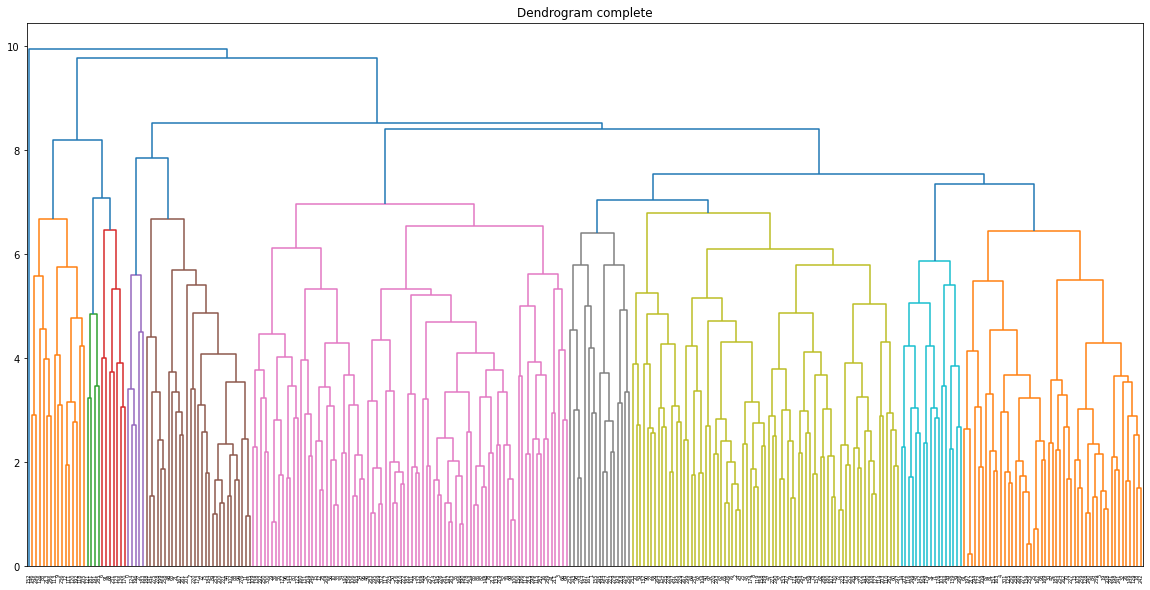

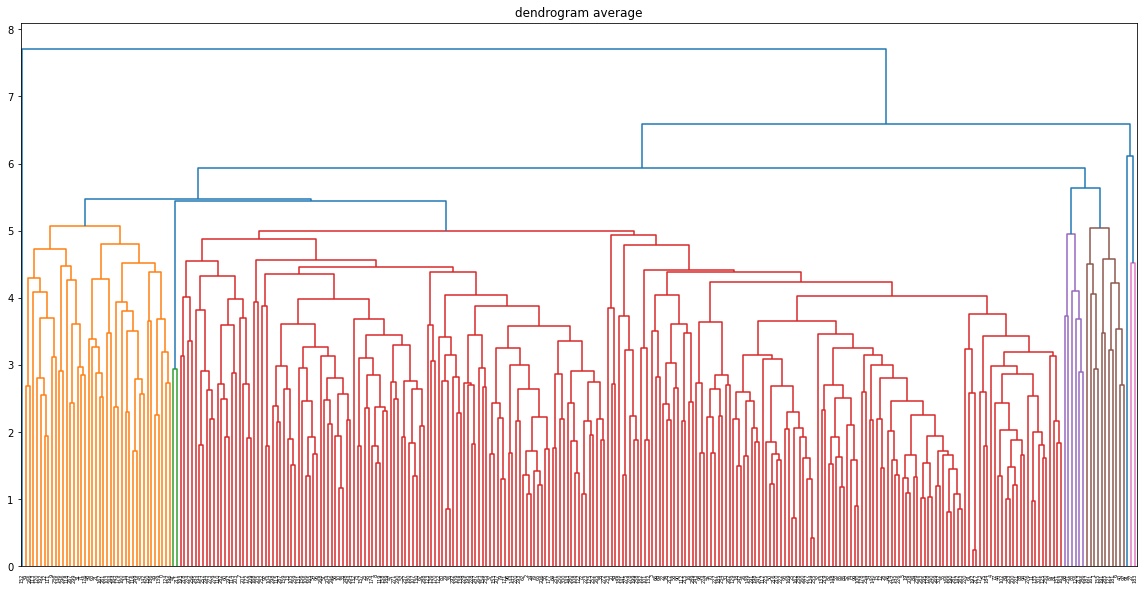

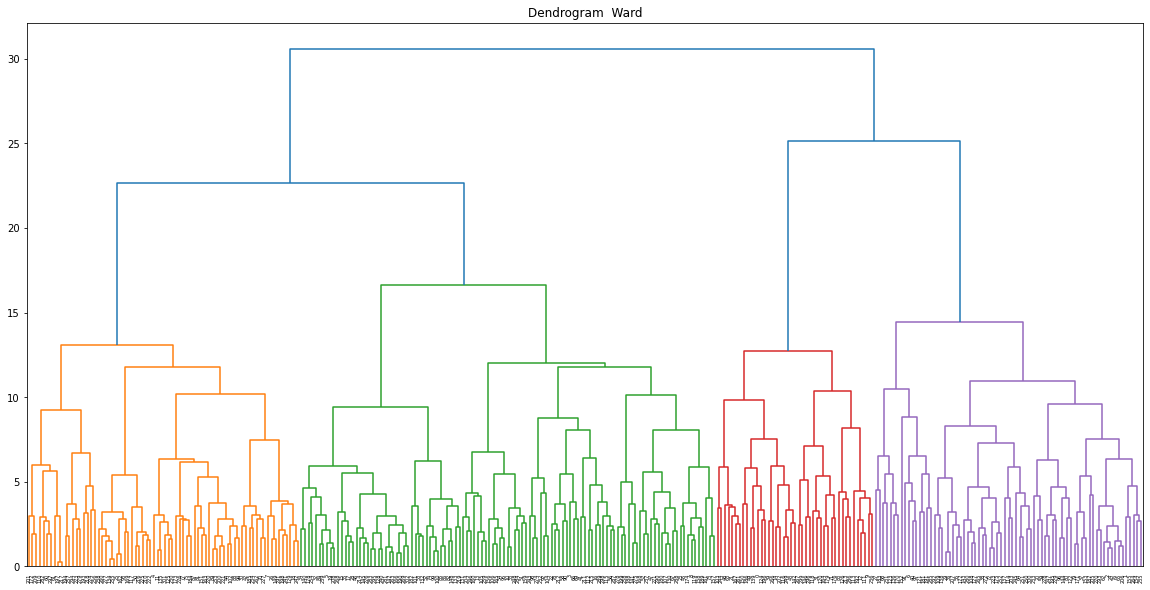

In [7]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("dendrogram average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram  Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

In [10]:
# Defining average
agg_cluster = AgglomerativeClustering(linkage="average", affinity='cosine',n_clusters=2)

# Fit 
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of average: {}".format(metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of average: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print('-' * 60)

# Defining complete
agg_cluster = AgglomerativeClustering(linkage="complete", affinity='cosine', n_clusters=2)

# Fit 
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of complete: {}".format(metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of complete: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("-"*60)

# Defining ward
agg_cluster = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=2)

# Fit 
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of ward: {}".format(metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of ward: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of average: 0.2940490133353465
Silhouette score of average: 0.14837359969689895
------------------------------------------------------------
ARI score of complete: 0.21394030618551016
Silhouette score of complete: 0.11730765444448985
------------------------------------------------------------
ARI score of ward: 0.146129913123814
Silhouette score of ward: 0.1387197366557222
